
## Simulating Nylon-6 Production Kinetics using Segment-Based Approach and Finite Difference Method

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

In [57]:
# data
R_const = 8.314472   # J/(K*mol)
T = 273+290   # deg K

A_0 = [0, 1.6632E2, 5.2617E6, 7.9328E5, 2.3827E8, 7.1392E4]
E_0 = [0, 8.3234E4, 9.7431E4, 9.5647E4, 1.7585E5, 8.9179E4]
A_c = [0, 1.1965E4, 3.3650E6, 4.5492E6, .4742E8, 8.3639E5]
E_c = [0, 7.8722E4, 8.6525E4, 8.4168E4, 1.5656E5, 8.5394E4]
delH= [0, 8.0287E3,-2.4889E4,-1.6927E4,-4.0186E4,-1.3266E4]
delS = [0, -3.3005E1, 3.9505, -2.9075E1, -6.0781E1, 2.4390]

# molecular weight (kg/mol)
MW={'P_1':131.17/1000,
    'TNH2':114.17/1000,
    'TCOOH':130.16/1000,
    'TAA':43.04/1000,
    'TCHA':98.17/1000,
    'BACA':113.16/1000,
    'CD':226.31/1000,
    'CL':113.16/1000,
    'W':18.02/1000,
    'AA':60.05/1000,
    'CHA':99.17/1000}


#### Initializing vectors

In [58]:
# initialize time vector
# N == dt per sec * sec per hr * desired hrs
dt=0.1 # sec
N=10*3600*8
t=[n*dt for n in range(N)]

In [59]:
# initialize forward rxn constant vector (kg/mol-s)
k1=[0]*N
k2=[0]*N
k3=[0]*N
k4=[0]*N
k5=[0]*N

# initialize reverse rxn constant vector (kg/mol-s)
k1_prime=[0]*N
k2_prime=[0]*N
k3_prime=[0]*N
k4_prime=[0]*N
k5_prime=[0]*N

In [60]:
# initialize number-average degree of polymerizaton vector
x_n=[0]*N
# initialize number-average molecular weight vector
m_n=[0]*N

# track polymer, by-product, and water mass
polymer_mass=[0]*N
byproduct_mass=[0]*N
water_mass=[0]*N

In [61]:
# initialize species vectors
W=[0]*N
CL=[0]*N
CD=[0]*N
AA=[0]*N
CHA=[0]*N
P_1=[0]*N
BACA=[0]*N
TNH2=[0]*N
TCOOH=[0]*N
TAA=[0]*N
TCHA=[0]*N

#### Defining equations

In [62]:
# rxn rate generator
def R(eqn,index):
    if eqn==1:
        return (k1[index]*CL[index]*W[index])-(k1_prime[index]*P_1[index])
    elif eqn==2:
        return (k2[index]*((P_1[index])**2))-(k2_prime[index]*P_1[index]*W[index])
    elif eqn==3:
        return (k2[index]*P_1[index]*TCOOH[index])-(k2_prime[index]*W[index]*(TCOOH[index]-P_1[index]-TAA[index]*(1/x_n[index])))
    elif eqn==4:
        return (k2[index]*TNH2[index]*P_1[index])-(k2_prime[index]*W[index]*(TNH2[index]-P_1[index]-TCHA[index]*(1/x_n[index])))
    elif eqn==5:
        return (k2[index]*TNH2[index]*TCOOH[index])-(k2_prime[index]*W[index]*(BACA[index]-TNH2[index]-TAA[index]+P_1[index]+TAA[index]*(1/x_n[index])+TCHA[index]*(1/x_n[index])))
    elif eqn==6:
        return (k3[index]*P_1[index]*CL[index])-(k3_prime[index]*P_1[index])
    elif eqn==7:
        return (k3[index]*TNH2[index]*CL[index])-(k3_prime[index]*(TNH2[index]-P_1[index]-TCHA[index]*(1/x_n[index])))
    elif eqn==8:
        return (k4[index]*CD[index]*W[index])-(k4_prime[index]*P_1[index])
    elif eqn==9:
        return (k5[index]*P_1[index]*CD[index])-(k5_prime[index]*P_1[index])
    elif eqn==10:
        return (k5[index]*TNH2[index]*CD[index])-(k5_prime[index]*(TNH2[index]-(2*P_1[index])-(2*TCHA[index]*(1/x_n[index]))))
    elif eqn==11:
        return (k2[index]*AA[index]*P_1[index])-(k2_prime[index]*W[index]*TAA[index]) 
    elif eqn==12:
        return (k2[index]*AA[index]*TNH2[index])-(k2_prime[index]*W[index]*TAA[index]*(1-(1/x_n[index])))
    elif eqn==13:
        return (k3[index]*CHA[index]*CL[index])-(k3_prime[index]*TCHA[index]*(1/x_n[index]))
    elif eqn==14:
        return (k2[index]*CHA[index]*P_1[index])-(k2_prime[index]*W[index]*TCHA[index]*(1/x_n[index]))
    elif eqn==15:
        return (k2[index]*CHA[index]*TCOOH[index])-(k2_prime[index]*W[index]*TCHA[index]*(1-(1/x_n[index])))
        

In [63]:
# forward rate constant generator
def nextk(const,index):
    return A_0[const]*exp(-E_0[const]/(R_const*T)) + A_c[const]*exp(-E_c[const]/(R_const*T))*(TCOOH[index]+P_1[index])

# backward rate constant generator
def nextk_prime(const,index):
    if const == 1:
        return k1[index]/exp((delS[const]-(delH[const]/T))/R_const)
    if const == 2:
        return k2[index]/exp((delS[const]-(delH[const]/T))/R_const)
    if const == 3:
        return k3[index]/exp((delS[const]-(delH[const]/T))/R_const)
    if const == 4:
        return k4[index]/exp((delS[const]-(delH[const]/T))/R_const)
    if const == 5:
        return k5[index]/exp((delS[const]-(delH[const]/T))/R_const)
    
# number-average degree of polymerization generator
def next_xn(index):
    return (BACA[index]+TCOOH[index]+TNH2[index]+P_1[index])/(TNH2[index]+TAA[index]+P_1[index])

# number-average molecular weight (kg/mol)
def next_mn(index):
    return ((BACA[index]*MW['BACA'])+(TCOOH[index]*MW['TCOOH'])+(TNH2[index]*MW['TNH2'])+(TAA[index]*MW['TAA'])+(TCHA[index]*MW['TCHA'])+(P_1[index]*MW['P_1']))/(P_1[index]+TNH2[index]+TAA[index])

In [64]:
# define difference equations

def nextW(dt,index): 
    return W[index]+(R(2,index)+R(3,index)+R(4,index)+R(5,index)+R(11,index)+R(12,index)+R(14,index)+R(15,index)-R(1,index)-R(8,index))*dt

def nextCL(dt,index):
    return CL[index]+(-R(1,index)-R(6,index)-R(7,index)-R(13,index))*dt

def nextCD(dt,index):
    return CD[index]-(R(8,index)+R(9,index)+R(10,index))*dt

def nextAA(dt,index):
    return AA[index]+(-R(11,index)-R(12,index))*dt

def nextCHA(dt,index):
    return CHA[index]+(-R(13,index)-R(14,index)-R(15,index))*dt
            
def nextP_1(dt,index):
    return P_1[index]+((R(1,index))-(2*R(2,index))-R(3,index)-R(4,index)-R(6,index)-R(9,index)-R(11,index)-R(14,index))*dt
            
def nextBACA(dt,index):
    return BACA[index]+(R(3,index)+R(4,index)+(2*R(5,index))+R(7,index)+R(9,index)+(2*R(10,index))+R(12,index)+R(15,index))*dt
    
def nextTNH2(dt,index):
    return TNH2[index]+(R(2,index)+R(6,index)+R(8,index)+R(9,index)+R(13,index)+R(14,index)-R(5,index)-R(12,index))*dt
    
def nextTCOOH(dt,index):
    return TCOOH[index]+(R(2,index)+R(6,index)+R(8,index)+R(9,index)+R(11,index)-R(5,index)-R(15,index))*dt
    
def nextTAA(dt,index):
    return TAA[index]+(R(11,index)+R(12,index))*dt
    
def nextTCHA(dt,index):
    return TCHA[index]+(R(13,index)+R(14,index)+R(15,index))*dt

#### Initial conditions

In [65]:
# initial mass charge (kg)
W_mass=1.5
CL_mass=(W_mass)*450
AA_mass=(CL_mass)*0.004/1000
CHA_mass=(CL_mass)*0.004*(5/3)/1000

total_mass = W_mass+CL_mass+AA_mass+CHA_mass

In [66]:
# initial concentration conditions (mol of species/kg of total mixture)
W[0]=W_mass/(MW['W'])/total_mass
CL[0]=CL_mass/(MW['CL'])/total_mass
CD[0]=0
AA[0]=AA_mass/(MW['AA'])/total_mass
CHA[0]=CHA_mass/(MW['CHA'])/total_mass
P_1[0]=0
BACA[0]=0
TNH2[0]=0
TCOOH[0]=0
TAA[0]=0
TCHA[0]=0

x_n[0]=1
m_n[0]=0

k1[0]=A_0[1]*exp(-E_0[1]/(R_const*T))
k2[0]=A_0[2]*exp(-E_0[2]/(R_const*T))
k3[0]=A_0[3]*exp(-E_0[3]/(R_const*T))
k4[0]=A_0[4]*exp(-E_0[4]/(R_const*T))
k5[0]=A_0[5]*exp(-E_0[5]/(R_const*T))

k1_prime[0]=k1[0]/exp((delS[1]-(delH[1]/T))/R_const)
k2_prime[0]=k2[0]/exp((delS[2]-(delH[2]/T))/R_const)
k3_prime[0]=k3[0]/exp((delS[3]-(delH[3]/T))/R_const)
k4_prime[0]=k4[0]/exp((delS[4]-(delH[4]/T))/R_const)
k5_prime[0]=k5[0]/exp((delS[5]-(delH[5]/T))/R_const)

#### Solve difference equations using euler's finite difference method

In [67]:
# solve difference eqns & store each time-step
for i in range(len(t)-1):
    W[i+1]=nextW(dt,i)
    CL[i+1]=nextCL(dt,i)
    CD[i+1]=nextCD(dt,i)
    AA[i+1]=nextAA(dt,i)
    CHA[i+1]=nextCHA(dt,i)
    P_1[i+1]=nextP_1(dt,i)
    BACA[i+1]=nextBACA(dt,i)
    TNH2[i+1]=nextTNH2(dt,i)
    TCOOH[i+1]=nextTCOOH(dt,i)
    TAA[i+1]=nextTAA(dt,i)
    TCHA[i+1]=nextTCHA(dt,i)    
    
    polymer_mass[i+1] = total_mass*((P_1[i+1]*MW['P_1'])+(BACA[i+1]*MW['BACA'])+(TCHA[i+1]*MW['TCHA'])+(TAA[i+1]*MW['TAA'])+(TNH2[i+1]*MW['TNH2'])+(TCOOH[i+1]*MW['TCOOH'])) 
    byproduct_mass[i+1] = total_mass*(CD[i+1]*MW['CD']) # kg
    water_mass[i+1] = total_mass*(W[i+1]*MW['W']) # kg
    
    m_n[i+1]=next_mn(i+1)
    x_n[i+1]=next_xn(i+1)
    
    k1[i+1]=nextk(1,i+1)
    k2[i+1]=nextk(2,i+1)
    k3[i+1]=nextk(3,i+1)
    k4[i+1]=nextk(4,i+1)
    k5[i+1]=nextk(5,i+1)
    
    k1_prime[i+1]=nextk_prime(1,i+1)
    k2_prime[i+1]=nextk_prime(2,i+1)
    k3_prime[i+1]=nextk_prime(3,i+1)
    k4_prime[i+1]=nextk_prime(4,i+1)
    k5_prime[i+1]=nextk_prime(5,i+1)

In [68]:
# mass fraction of polymer, water, and caprolactam
X_w=[0]*N
X_p=[0]*N
X_c=[0]*N
for i in range(len(t)):
    X_p[i] = (P_1[i]*MW['P_1'])+(BACA[i]*MW['BACA']+TCHA[i]*MW['TCHA'])+(TAA[i]*MW['TAA']+(TNH2[i]*MW['TNH2'])+(TCOOH[i]*MW['TCOOH'])) # kg of polymer / total kg
    X_w[i] = (W[i]*MW['W'])
    X_c[i] = (CL[i]*MW['CL'])
    

In [69]:
df = pd.DataFrame({'t':t,
                  'W':W,
                  'CL':CL,
                  'CD':CD,
                  'AA':AA,
                  'CHA':CHA,
                  'P_1':P_1,
                  'BACA':BACA,
                  'TNH2':TNH2,
                  'TCOOH':TCOOH,
                  'TAA':TAA,
                  'TCHA':TCHA,
                  'k1':k1,
                  'k2':k2,
                  'k3':k3,
                  'k4':k4,
                  'k5':k5,
                  'k1_prime':k1_prime,
                  'k2_prime':k2_prime,
                  'k3_prime':k3_prime,
                  'k4_prime':k4_prime,
                  'k5_prime':k5_prime,
                  'X_p':X_p,
                  'X_w':X_w,
                  'X_c':X_c,
                  'x_n':x_n,
                  'm_n':m_n,
                  'polymer_mass':polymer_mass,
                  'byproduct_mass':byproduct_mass,
                  'water_mass':water_mass})


In [70]:
# desired amount of end product (kg)
pl = 230 # kg (lower bound)
pu = 680 # kg (upper bound)

# time of extraction (hrs)
extract_time = 8
e = 10*3600*extract_time # convert units to dt units (dt==0.1 sec)

# fraction of reactor to be filled at max capacity
r = 0.7

# reactor size in liters (assuming 1 kg/l density)
print("lower bound: ",round((pl/(X_p[e-1]))/r,0),"L \n             ", round(((pl/(X_p[e-1]))/r)*0.264172,0),'gal','\n')
print("upper bound: ",round((pu/(X_p[e-1]))/r,0),"L \n             ", round(((pu/(X_p[e-1]))/r)*0.264172,0),'gal')

lower bound:  372.0 L 
              98.0 gal 

upper bound:  1100.0 L 
              290.0 gal


## Plots

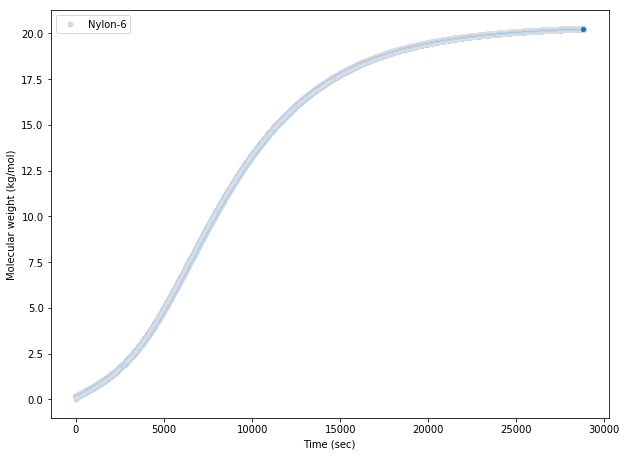

In [71]:
# plot number-average molecular weight over time
fig,ax = plt.subplots(figsize=(10,7.5))
sns.scatterplot(x="t", y="m_n", data=df, ax=ax,label="Nylon-6",alpha=0.25)
plt.ylabel("Molecular weight (kg/mol)")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
plt.legend()
plt.show()

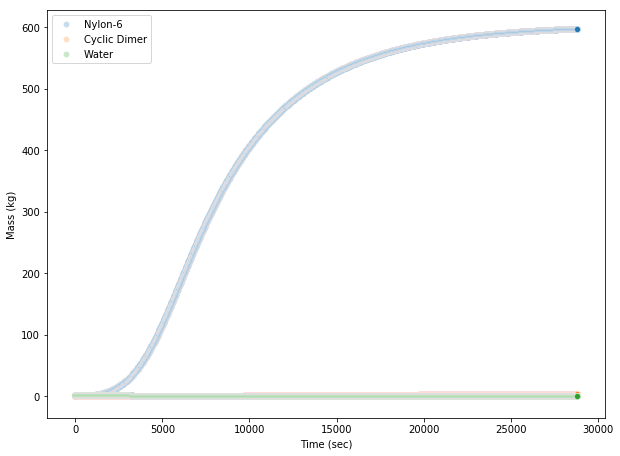

In [72]:
# plot product mass over time
fig,ax1 = plt.subplots(figsize=(10,7.5))
# ax1.set_ylabel(ylabel='Polymer mass (kg)')
# ax1.set_xlabel(xlabel="Time(sec)")
# sns.scatterplot(df["t"], df["polymer_mass"], ax=ax1, label="Nylon-6",color='xkcd:brick red')

# ax2 = ax.twinx()
# ax2.set_ylabel(ylabel='By-product/Water mass (kg)')
# ax.set_xlabel(xlabel="Time(sec)")
# ax2.plot(df["t"], df["byproduct_mass"],label="Cyclic Dimer",color='xkcd:slate grey')
# ax2.plot(df["t"], df["water_mass"],label="Water",color='xkcd:twilight blue')

sns.scatterplot(x="t", y="polymer_mass", data=df, ax=ax1,label="Nylon-6",alpha=0.25)
sns.scatterplot(x="t", y="byproduct_mass", data=df, ax=ax1,label="Cyclic Dimer",alpha=0.25)
sns.scatterplot(x="t", y="water_mass", data=df, ax=ax1,label="Water",alpha=0.25)
plt.ylabel("Mass (kg)")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
ax.figure.legend()
plt.show()

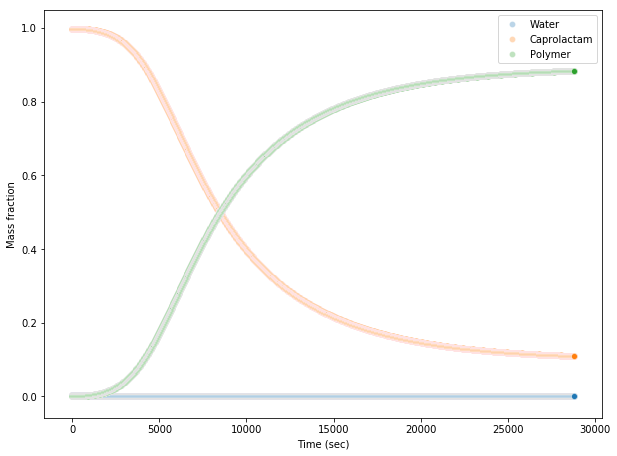

In [73]:
# plot polymer mass fraction as a function of time for each significant species
fig,ax = plt.subplots(figsize=(10,7.5))
sns.scatterplot(x="t", y="X_w", data=df,ax=ax,label="Water",alpha=0.3)
sns.scatterplot(x="t", y="X_c", data=df,ax=ax,label="Caprolactam",alpha=0.3)
sns.scatterplot(x="t", y="X_p", data=df,ax=ax,label="Polymer",alpha=0.3)
plt.ylabel("Mass fraction")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
plt.legend()
plt.show()

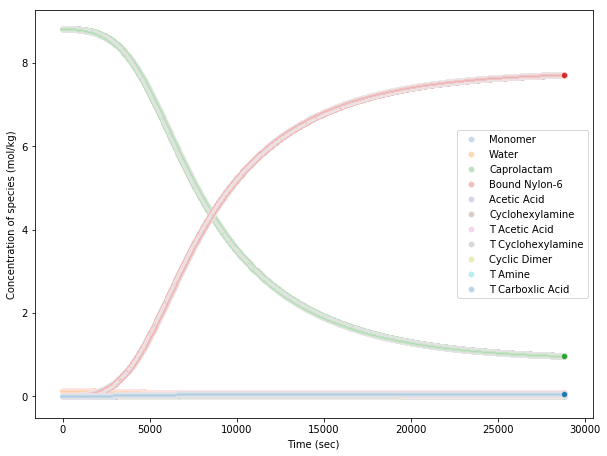

In [74]:
# plot concentration as a function of time for each significant species
fig,ax = plt.subplots(figsize=(10,7.5))
sns.scatterplot(x="t", y="P_1", data=df, ax=ax,label="Monomer",alpha=0.25)
sns.scatterplot(x="t", y="W", data=df,ax=ax,label="Water",alpha=0.3)
sns.scatterplot(x="t", y="CL", data=df,ax=ax,label="Caprolactam",alpha=0.3)
sns.scatterplot(x="t", y="BACA", data=df,ax=ax,label="Bound Nylon-6",alpha=0.3)
sns.scatterplot(x="t", y="AA", data=df,ax=ax,label="Acetic Acid",alpha=0.3)
sns.scatterplot(x="t", y="CHA", data=df,ax=ax,label="Cyclohexylamine",alpha=0.3)
sns.scatterplot(x="t", y="TAA", data=df,ax=ax,label="T Acetic Acid",alpha=0.3)
sns.scatterplot(x="t", y="TCHA", data=df,ax=ax,label="T Cyclohexylamine",alpha=0.3)
sns.scatterplot(x="t", y="CD", data=df,ax=ax,label="Cyclic Dimer",alpha=0.3)
sns.scatterplot(x="t", y="TNH2", data=df,ax=ax,label="T Amine",alpha=0.3)
sns.scatterplot(x="t", y="TCOOH", data=df,ax=ax,label="T Carboxlic Acid",alpha=0.3)
plt.ylabel("Concentration of species (mol/kg)")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
plt.legend()
plt.show()

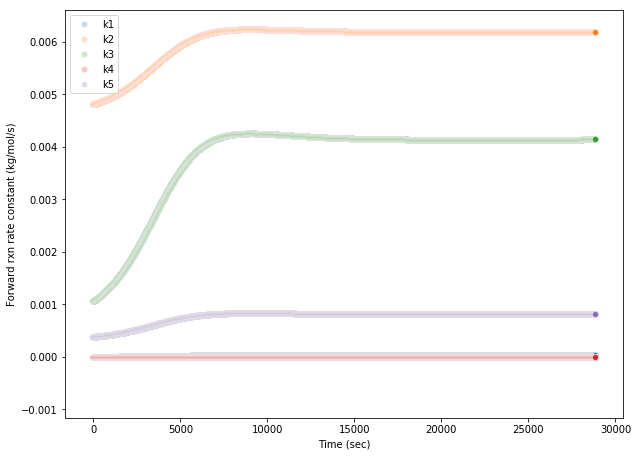

In [75]:
# plot forward rxn rate constants
fig,ax = plt.subplots(figsize=(10,7.5))
sns.scatterplot(x="t", y="k1", data=df, ax=ax,label="k1",alpha=0.25)
sns.scatterplot(x="t", y="k2", data=df,ax=ax,label="k2",alpha=0.25)
sns.scatterplot(x="t", y="k3", data=df,ax=ax,label="k3",alpha=0.25)
sns.scatterplot(x="t", y="k4", data=df,ax=ax,label="k4",alpha=0.25)
sns.scatterplot(x="t", y="k5", data=df,ax=ax,label="k5",alpha=0.25)
plt.ylabel("Forward rxn rate constant (kg/mol/s)")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
#plt.ylim(-0.001,0.003)
plt.legend()
plt.show()

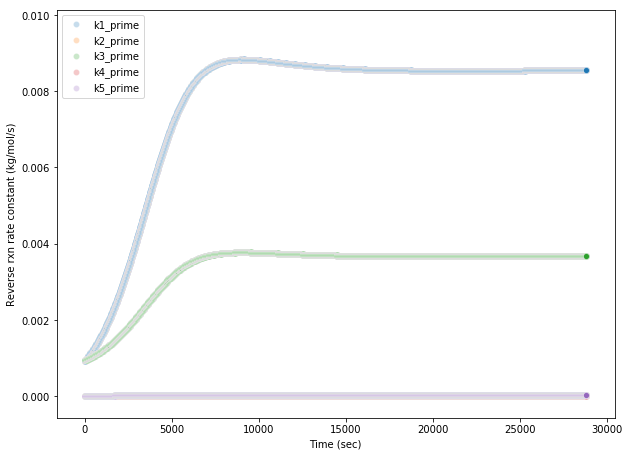

In [76]:
# plot reverse rxn rate constants 
fig, ax = plt.subplots(figsize=(10,7.5))
sns.scatterplot(x="t", y="k1_prime", data=df, ax=ax,label="k1_prime",alpha=0.25)
sns.scatterplot(x="t", y="k2_prime", data=df,ax=ax,label="k2_prime",alpha=0.25)
sns.scatterplot(x="t", y="k3_prime", data=df,ax=ax,label="k3_prime",alpha=0.25)
sns.scatterplot(x="t", y="k4_prime", data=df,ax=ax,label="k4_prime",alpha=0.25)
sns.scatterplot(x="t", y="k5_prime", data=df,ax=ax,label="k5_prime",alpha=0.25)
plt.ylabel("Reverse rxn rate constant (kg/mol/s)")
plt.xlabel("Time (sec)")
#plt.xlim(0,21600)
plt.legend()
plt.show()